Notes: Introduction
Pandas used to categorise and simplify dataframe
Seaborn developed as a wrapper to simplify the use of dataframes in matplotlibs




    read_csv("filepath", sep=';') :: Always encode in UTF-8, (use excel delimiter with option sep=';' for data specific separators)
    to_csv()   :: Always encode in UTF-8 (for natural language and character compatibility)
        


## Observational Studies:
1) Correlation can be inferred

## Experimental Studies:
1) Randomly Assign subjects to various treatments\

2) Causation can be inferred

## Random Sampling
1) subjects randomly selected from population

2) Result generalised to population

## Random Assignment
1) Subjects are randomly assigned to treatments

2) Only in experimental studies


## Resampling
Minimization of Residuals (OLS estimation)

Maximum Likelihood Estimation

Sampling (Bootstrap, Monte Carlo)

# Urn Model Example
Experiment: Study the effects of calcium supplements on blood pressure for male subjects. Radnomised into 2 groups, one received calcium supplement for 12 weeks, the other received a placebo for 12 weeks. The experiment is double blind. The response is measured as initial blood pressure - blood pressure after 12 weeks.

Treatment Group: 7, -4, 18, 17, -3, -5, 1, 10, 11, -2

Placebo Group: -1, 12, -1, -3, 3, -5, 5, 2, -11, -1, -3

These indicate the response (change in blood pressure) after 12 weeks

In [1]:
#All the responses are thrown into one batch
urn = [7, -4, 18, 17, -3, -5, 1, 10, 11, -2, -1, 12, -1, -3, 3, -5, 5, 2, -11, -1, -3]

In [2]:
#Draws: drawing 10 values from the batched data. Not replaced
#the drawn marbles are the "treatment" and the remaining are the "control"
#The following is an example of a single sample

import numpy as np
calc = np.random.choice(urn, 10, replace = False)
np.mean(calc)

4.0

To approach the question of What if the calcium makes no difference and that the results could've been obtained by random chance, the Urn model assumes that the calcium supplement has no effect, then all subjects would have the responses whether or not they received the supplement. We compute the average change in blood pressure for the treatment (test stat), then we repeat this thousands of times to get the distribution of the mean change in blood pressure.

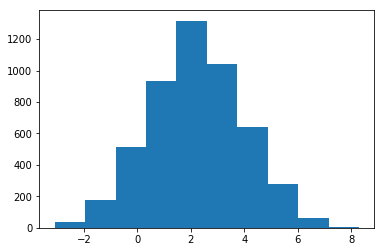

In [32]:
#The above single sample must be repeated many times to get the distribution of the statistic

import matplotlib.pyplot as plt
avgs = []
for i in range (0, 5000):
    avgs.append(np.mean(np.random.choice(urn, 10, replace = False)))
    
plt.hist(avgs)
plt.show()

An Urn model is used because it connects statistical techniques to underlying chance. Now we have to connect this empirical result to the probability of it happening by random chance. An Urn model can be used in stead of a T-test or a Chi-square in some cases. It is good to compare the Urn model result to these tests.

In [4]:
treatment = [7, -4, 18, 17, -3, -5, 1, 10, 11, -2]
placebo = [-1, 12, -1, -3, 3, -5, 5, 2, -11, -1, -3]
print(np.mean(treatment))
print(np.mean(placebo),"\n")

print("P-value of the above Urn model") #The amount of observed means of 5 out of all the observed means
treatment_value = [i for i in avgs if i >= 5]
pv = len(treatment_value)/5000
print(pv)

print("\n","Treatment Effect","\n","Ho: mean <= 5","\n","Ha: mean > 5")
if(pv < 0.1):
    print("Reject the Null Hypothesis at a 10% level of significance")
elif (pv < 0.05):
    print("Reject the Null Hypothesis at a 5% level of significance")
else:
    print("Do not reject the Null Hypothesis at either a 5% or 10% level of significance")

5.0
-0.2727272727272727 

P-value of the above Urn model
0.0608

 Treatment Effect 
 Ho: mean <= 5 
 Ha: mean > 5
Reject the Null Hypothesis at a 10% level of significance


Since the mean of the treatment group is 5.0, we can determine what is the probability of this mean occuring by random chance by taking the amount of occurrences over the total amount of sample statistics. (I.E prob success over total prob).

## Two Sample, One Tail T-test
    H0: Placebo >= Treatment
    Ha: Placebo < Treatment
Scipy library functions can be used to make a hypothesis test based on the value of E(x) and E(y): Note that since the values in the calculation are all positive, we cannot use the p-value as is and should divide it by 2 as seen in the Two Tail T-test

In [5]:
from scipy import stats
stats.ttest_ind(treatment, placebo)
#Since this is a one-tail test we do the following: Reject Ho if p_val/2 < alpha

Ttest_indResult(statistic=1.6341082415908594, pvalue=0.11869682666685942)

## Two Sample, Two Tailed T-test
We can do some string handling to get the p-value on its own.

    NOTE: stats.ttest_ind() and stats.ttest_1samp() both give
    the two-tail p_value. So whenever using those functions, 
    remember to divide by 2 to get the useful p-val.

In [6]:
result = stats.ttest_ind(treatment, placebo)
if (result[1]/2 < 0.1):  #This is testing with a significance of 10% (alpha = 0.1)
    print("Reject the Null Hypothesis at a 10% level of significance")
else:
    print("Do not reject the Null Hypothesis at a 10% level of significance")

Reject the Null Hypothesis at a 10% level of significance


## One Sample, One Tail T-test
Here we replicate the Urn model. Instead of separating Treatment and Placebo we ask, What are the chances that the change in blood pressure of higher than 5.0 is random? (I.E, What are the chances that the mean of 5.0 occurred randomly). This means we define our inference as follows:

    Ho: mean <= 5   (observing a value of higher than 5 is random)
    Ha: mean > 5    (observing a value of higher than 5 is not random)
    
In this case the sign is important. A positive sign implies that the sample mean is larger than the hypothesized mean, indicating evidence against Ho. 

In [7]:
#Testing whether the mean (mu) is greater than 5
mu = 5
result = stats.ttest_1samp(urn,mu)
print("Critical Value: ", result[0])
print("P-value: ", result[1]/2, "\n")
print("Hypothesis Conclusion")

if(result[0] > 0) & (result[1]/2 < 0.1):
    print("Reject the Null Hypothesis at a 10% level of significance")
elif (result[0] > 0) & (result[1]/2 < 0.05):
    print("Reject the Null Hypothesis at a 5% level of significance")
else:
    print("Do not reject the Null Hypothesis at either a 5% or 10% level of significance")

Critical Value:  -1.6464919104720495
P-value:  0.05764327437588174 

Hypothesis Conclusion
Do not reject the Null Hypothesis at either a 5% or 10% level of significance


The result of the Urn model p_value is very similar to the t-test p_value. In neither case can we reject the Null hypothesis at a 5% level of significance. This indicates that the treatment effect is significant at more than 10% significance, but at 5% it performs no better than random.

# Monte Carlo and Bootstrapping
The main methods of studying the Sampling Distribution of a Statistic:
    1) Probability Theory
    2) Simple Monte Carlo Simulation
    3) Bootstrapping the Sample
    
Monte Carlo methods involve generating a distribution by repeatedly sampling a certain amount in order to gain insights about the population.

In Bootstrapping, we only have a sample and not a population. Since the sample (more or less) estimates the population, we use the sample as the population (this is creating a Bootstrap population), then we do the same process of drawing from the Bootstrap population repeatedly, finding a distribution thereof and gaining insights about the population.

Bootstrapping is a useful tool but the following are limiting factors; Needs a large and random sample so that the sample best resembles the population. The bootstrap process is repeated many times, 10 000 replications is a reasonable number. Difficulties arise when parameter estimates are significantly influenced by outliers or the paramter is based on extreme values of the distribution. Also is the sampling distribution is significantly different from a normal distribution.


## Monte Carlo Simulation
Using Health and Safety Scores for San-Fransisco Restaurants database

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [9]:
scores = pd.read_csv("inspectionScores2016.csv")
restaurant_score = np.array(scores["score"])

Next we obtain the population distribution and relevant statistics (mean and variance)

Mean:  90.27977107638125
Std Deviation:  7.981838991022633


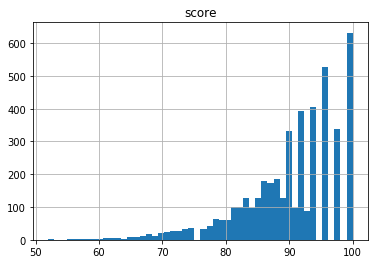

In [10]:
population_mean = np.mean(scores["score"])
population_stdD = np.std(scores["score"])

print("Mean: ", population_mean)
print("Std Deviation: ", population_stdD)

scores.hist("score", bins = 50)
plt.show()

Here we draw a simple random sample of size n = 100 from the population. The sample statistics should resemble the population statistics. The histogram should somewhat resemble the population histogram, but results will vary.

Mean:  89.73
Std Deviation:  8.14844156879093


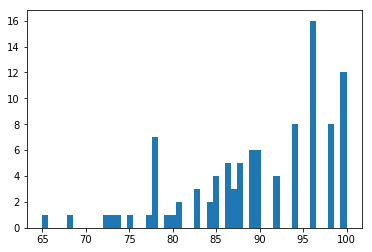

In [11]:
restaurant_sample = random.sample(list(scores["score"]),100)
sample_mean = np.mean(restaurant_sample)
sample_stdD = np.std(restaurant_sample)
print("Mean: ", sample_mean)
print("Std Deviation: ", sample_stdD)

plt.hist(restaurant_sample, bins = 50)
plt.show()

The single draw above is not an accurate enough measure of the population, we must use Monte Carlo techniques for creating a sample distribution of the draws in order to gain insights about the population. Below is shown how the resampling is done and how the sampling distribution statistics behave. Notice how the distribtuion is centered around a value close to the population mean and the same is the case for the standard deviation respectively.

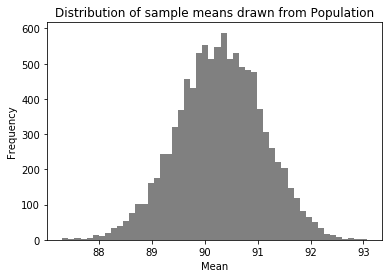

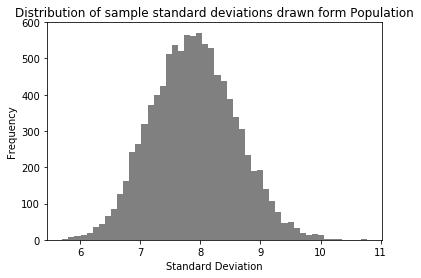

In [12]:
sample_means = []
sample_std_dev = []

for i in range (0,10000):
    draw_list = []
    for j in range (0,100):
        draw_list.append(random.choice(scores["score"]))
        
    sample_means.append(np.asarray(draw_list).mean())
    sample_std_dev.append(np.asarray(draw_list).std())
    
plt.title("Distribution of sample means drawn from Population")
plt.xlabel("Mean")
plt.ylabel("Frequency")
plt.hist(sample_means, bins = 50, color = "grey")
plt.show()

plt.title("Distribution of sample standard deviations drawn form Population")
plt.xlabel("Standard Deviation")
plt.ylabel("Frequency")
plt.hist(sample_std_dev, bins = 50, color="grey")
plt.show()

## Bootstrapping
Lets consider the case where we only have one of the above samples available to us. We will be using a bootstrap sample of n = 100 of which we will sample the mean 10 000 times to get an insight to the population.

Bootstrap Mean:  90.2863
Bootstrap Standard Deviation:  0.8087 



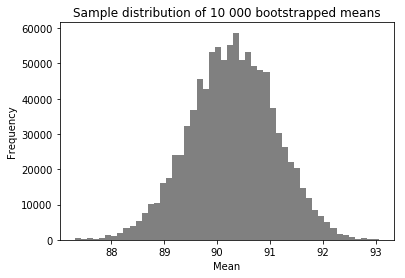

In [13]:
bootstrap_sample = []

for i in range (0,10000):
    for j in range (0,100):
        bootstrap_sample.append(random.choice(sample_means))    #Not necessary to calculate means as these are samples
                                                                #of the means.
        
print("Bootstrap Mean: ",round(np.asarray(bootstrap_sample).mean(),4)) #rounding to 4 decimal points
print("Bootstrap Standard Deviation: ", round(np.asarray(bootstrap_sample).std(),4),"\n")
        
plt.title("Sample distribution of 10 000 bootstrapped means")
plt.xlabel("Mean")
plt.ylabel("Frequency")
plt.hist(bootstrap_sample, bins = 50, color = "grey")
plt.show()

Bootstrapping can also be done if we want to calculate other statistics of interest. Here we will determine the distribution of the proportion of scores above 95 using the bootstrap population. We first need to create a bootstrap population from the restaurant score sample we have. We will create a population of 5000 from the population as we are no longer working with sample means.

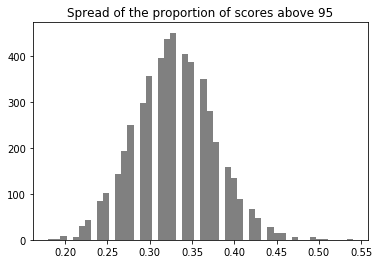

In [14]:
bootstrap_population = []
bootstrap_proportion = []

for i in range (0,5000):
    restaurant_sample = np.random.choice(scores["score"],100)
    bootstrap_proportion.append(len(restaurant_sample[restaurant_sample>95])/100)
    
plt.title("Spread of the proportion of scores above 95")
plt.hist(bootstrap_proportion, bins=50, color="grey")
plt.show()

Another usefull statistic is the confidence interval. Here we calculate the confidence interval on the bootstrapped proportion using scipy library functions


In [15]:
from scipy.stats import sem, t
from scipy import mean

confidence = 0.95
for i in range (0,100):
    std_err = sem(bootstrap_proportion)
    h = std_err* t.ppf((confidence + 1) / 2, len(bootstrap_proportion) - 1)
    start = bootstrap_proportion - h
    end = bootstrap_proportion + h
    
for j in range (0,5):
    print(start[j]," - ",end[j])

0.3087035973234577  -  0.3112964026765423
0.3187035973234577  -  0.3212964026765423
0.3087035973234577  -  0.3112964026765423
0.2687035973234577  -  0.2712964026765423
0.3487035973234577  -  0.3512964026765423


# Natural Language Processing and Text Mining
## Unstructured Text:
    No metadata
    Observations not labelled
    veracity and uncertainty
    highly dimensional
Despite these drawbacks, unstructured text allows for larger volumes and more current data to exist, and an underlying semantic pattern will exist regardless.

## Manifold Hypothesis:
This states that high dimensional spaces tend to lie in the vicintiy of underlying lower dimensional spaces (manifolds). An analogy would be in clustering, where small clusters tend to cluster (albeit not apparant) into larger, but less clear groups.

## Working with Raw Text:
Not all the words in a sample of text are going to be useful, and the more of them there are, the greater will your factor of noise. A computer when reading a raw text input will treat the entire text as one object. It is necessary to break up the text in a way that can interpret each word or input separately.

In [16]:
sample_text = "I am a student from the University of Alabama. I was born in Ontario, Canada and I am a huge fan of the United States. I am going to get a degree in Philosophy to improvemy chances of becoming a Philosophy professor. I have beenworking towards this goal for 4 years. I am currently enrolledin a PhD program. It is very difficult, but I am confident thatit will be a good decision"


Above is an example of such raw text, if you print the sample_text it will return the entire string literal as one object. Enter tokenization, the process of separating a single string object into individual tokens that represent words or characters. The Natural Language toolkit (NLTK) provides many functions for working with raw texts. Here we import the NLTK tools from the library (you might have to install a repository with the following code:

    import nltk
    nltk.download('punkt')
    
Now when you print the sample_word_tokens variable, it is visible that the string is now broken up into separate independant words.

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ben/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
from nltk.tokenize import word_tokenize , sent_tokenize
from nltk.corpus import stopwords

sample_word_tokens = word_tokenize(sample_text)
sample_sent_tokens = sent_tokenize(sample_text)
print(sample_word_tokens)

['I', 'am', 'a', 'student', 'from', 'the', 'University', 'of', 'Alabama', '.', 'I', 'was', 'born', 'in', 'Ontario', ',', 'Canada', 'and', 'I', 'am', 'a', 'huge', 'fan', 'of', 'the', 'United', 'States', '.', 'I', 'am', 'going', 'to', 'get', 'a', 'degree', 'in', 'Philosophy', 'to', 'improvemy', 'chances', 'of', 'becoming', 'a', 'Philosophy', 'professor', '.', 'I', 'have', 'beenworking', 'towards', 'this', 'goal', 'for', '4', 'years', '.', 'I', 'am', 'currently', 'enrolledin', 'a', 'PhD', 'program', '.', 'It', 'is', 'very', 'difficult', ',', 'but', 'I', 'am', 'confident', 'thatit', 'will', 'be', 'a', 'good', 'decision']


The other function, sent_tokenize(), is a function that creates sentence tokens instead of word tokens. (I.E it breaks up text into sentences and not words). The text is still not yet useable, we have to remove all the words that do not contribute to the meaning of the text, these are auxiliary articles, pronouns and other classes that express grammatical relationship rather than intrinsic meaning. These are called stop-words and there is an NLTK dictionary of common stop-words and tools which can remove them. (Once again, you might need to install an additional repository:

    import nltk
    nltk.download('stopwords')

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ben/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
set(stopwords.words('english'))

stop_words = [word.upper() for word in stopwords.words('english')]
word_tokens = [word for word in sample_word_tokens if word.upper() not in stop_words]

print(word_tokens)

['student', 'University', 'Alabama', '.', 'born', 'Ontario', ',', 'Canada', 'huge', 'fan', 'United', 'States', '.', 'going', 'get', 'degree', 'Philosophy', 'improvemy', 'chances', 'becoming', 'Philosophy', 'professor', '.', 'beenworking', 'towards', 'goal', '4', 'years', '.', 'currently', 'enrolledin', 'PhD', 'program', '.', 'difficult', ',', 'confident', 'thatit', 'good', 'decision']


Although many of the stopwords have been removed, grammatical characters still exist in the text. The NLTK package also contains a tokenizer which can be used to get rid of these, using a Regex match pattern

In [21]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+') #regex pattern to match only words (not symbols or numbers)
sample_word_tokens = tokenizer.tokenize(str(word_tokens))
sample_word_tokens = [word.lower() for word in sample_word_tokens]

print(sample_word_tokens)

['student', 'university', 'alabama', 'born', 'ontario', 'canada', 'huge', 'fan', 'united', 'states', 'going', 'get', 'degree', 'philosophy', 'improvemy', 'chances', 'becoming', 'philosophy', 'professor', 'beenworking', 'towards', 'goal', '4', 'years', 'currently', 'enrolledin', 'phd', 'program', 'difficult', 'confident', 'thatit', 'good', 'decision']


## Bag of Words
This simply counts the occurrence of words in a text, it does not take into account there meaning or their order.

In [22]:
import re
import collections

def bag_of_words(text):
    _bag_of_words = [collections.Counter(re.findall(r'\w+', word)) for word in text]
    bag_of_words = sum(_bag_of_words, collections.Counter())
    return bag_of_words

sample_word_tokens_bow = bag_of_words(text=sample_word_tokens)
print(sample_word_tokens_bow)

Counter({'philosophy': 2, 'student': 1, 'university': 1, 'alabama': 1, 'born': 1, 'ontario': 1, 'canada': 1, 'huge': 1, 'fan': 1, 'united': 1, 'states': 1, 'going': 1, 'get': 1, 'degree': 1, 'improvemy': 1, 'chances': 1, 'becoming': 1, 'professor': 1, 'beenworking': 1, 'towards': 1, 'goal': 1, '4': 1, 'years': 1, 'currently': 1, 'enrolledin': 1, 'phd': 1, 'program': 1, 'difficult': 1, 'confident': 1, 'thatit': 1, 'good': 1, 'decision': 1})


Now to consider the SciKit learn library (one which is specialized for machine learning applications) and its equivalent toolkit. The sklearn preprocessing tool for raw text is an implementation of the Bag of Words algorithm which allow you to get the feature names (tokens) and the frequency of their occurrence.

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
def bow_sklearn(text=sample_sent_tokens):
    c = CountVectorizer(stop_words='english',token_pattern=r'\w+')
    converted_data = c.fit_transform(text).todense()
    print("Shape: ", converted_data.shape, '\n')
    return c.get_feature_names() , converted_data

print(bow_sklearn())

Shape:  (6, 29) 

(['4', 'alabama', 'beenworking', 'born', 'canada', 'chances', 'confident', 'currently', 'decision', 'degree', 'difficult', 'enrolledin', 'fan', 'goal', 'going', 'good', 'huge', 'improvemy', 'ontario', 'phd', 'philosophy', 'professor', 'program', 'states', 'student', 'thatit', 'united', 'university', 'years'], matrix([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 1, 0, 0, 1, 0],
        [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
         0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2,
         1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
         0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 0, 0, 0]], dtype=int64))


# Text Transformation (Preprocessing)
## Cosine Similarity
The Cosine similarity measures the angle between Xi and Xi' when interpreted as vectors. Because Xi is a count vector (non-negative), the cosine similarity is between 0 and 1. Formulated as the product of the Vectors Xi * Xi' divided by the product of the euclidean distance of the two vectors. (Euc. Distance = sqrt(Sum of squares of Vector)).  

## Text Frequency - Inverse Document Frequency (TF-IDF)
TF : Number of occurences of a word in a document
IDF: Log( Total number of documents / Number of documents containing Term)
Bag of Words vectors can be transformed by TF-IDF to get a vector, the cosine similarity can then be determined using the transformed vector. TF-IDF is used because it is easy to get document similarity, the relevant words are kept secure while un-weighting the very frequent words.

The following example uses the Movie Review data IMDB.csv:


In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()      ## Encode labels with value between 0 and n_classes - 1
review = pd.read_csv('IMDB.csv')
review['target'] = le.fit_transform(review['sentiment']) ## classes positive||negative so 1 or 0 in column "target"
review.drop('sentiment', axis = 1, inplace = True)   ##sentiment column no longer needed 
X_arr = review['review'].tolist()
X_arr = X_arr[0:2000]       ##Use only first 2000 rows

Now that we have a nicely formatted list, we can fit a logistic regression model using Bag of Words vectorization along with TF-IDF transformed numerical values for the text.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.5, min_df=2, ngram_range=(1,2), stop_words='english', token_pattern=r'\b[^\d\W]+\b')
bag_of_words = tfidf.fit_transform(X_arr)
feature_names = tfidf.get_feature_names()
vectorized_text = pd.DataFrame(bag_of_words.todense(), columns=tfidf.get_feature_names())

We have now made a TF-IDF transformed bag_of_words vector. The next step is to split the data into a training and a testing set in order to use a Logistic Regression machine learning function to make a model

In [26]:
X_train = vectorized_text[0:1000]
X_test = vectorized_text[1000:2000]
Y_train = review['target'][0:1000]
Y_test = review['target'][1000:2000]

Data is split 50-50 between training and testing. Now we fit a logistic regression model to the data.

In [27]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(solver = 'lbfgs')
logistic_model = logistic.fit(X_train, Y_train)  ##The model should be fitted to the training data
acc = logistic_model.score(X_train, Y_train)
ratio_class1 = Y_train.mean()

Since we now have a model fitted, predictions can be made as to the nature of reviews found in the text. We import the sklearn "metrics" library in order to get the classification report. This gives insight to the model accuracy, recall and precision.

In [28]:
from sklearn import metrics

predicted = logistic_model.predict(X_test)
probs = logistic_model.predict_proba(X_test)
acc_score = metrics.accuracy_score(Y_test, predicted)  ##Test the real values against the predicted
auc_score = metrics.roc_auc_score(Y_test, probs[:,1])  ##Calculate auc = area under curve, use for ROC parameters

print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       496
           1       0.82      0.84      0.83       504

   micro avg       0.82      0.82      0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000



We can gain better understanding by representing the accuracy visually with a ROC (Reciever operating characteristic) curve. Compares the number of true positives to false positives. If model performs just as well as totally random then the curve will follow the diagonal.

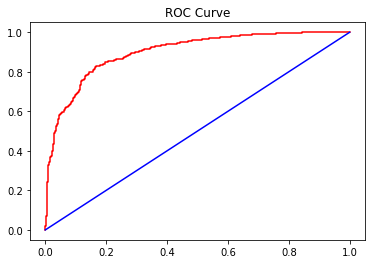

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

X,Y,lim = metrics.roc_curve(Y_test, probs[:,1])
plt.figure()
plt.title('ROC Curve')
plt.plot(X,Y,'red')  ##Plot the false positives (X) to the true positives (Y)
plt.plot([0,1],[0,1],'blue')  ##Plot the diagonal
plt.show()

## Naive Bayes Classifier
Basically the only difference between this and the above TF-IDF Logistic Regression method is that the occurrence of terms in each document is weighted the same (I.E it does not account for words that exist frequently in many documents, whereas TF-IDF reduces the effect of words that occur in many documents). So it is expected to be ever so slightly less accurate than TF-IDF Logistic Regression as will now be shown with the same data

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

cvec = CountVectorizer(stop_words='english', token_pattern=r'\b[^\d\W]+\b')
bag_of_words = cvec.fit_transform(X_arr)  ##Here we assume the same data cleaning has been done (first 2000 obs)
feature_names = cvec.get_feature_names()
vectorized_text = pd.DataFrame(bag_of_words.todense(), columns=feature_names)

X_train = vectorized_text[0:1000]
X_test = vectorized_text[1000:2000]
Y_train = review['target'][0:1000]
Y_test = review['target'][1000:2000]

nb = MultinomialNB()
nb_model = nb.fit(X_train, Y_train)
acc = nb_model.score(X_train, Y_train)
ratio_class1 = Y_train.mean()

predicted = nb_model.predict(X_test) ##used in metrics report
probs = nb_model.predict_proba(X_test)
acc_score = metrics.accuracy_score(Y_test,predicted)
auc_score = metrics.roc_auc_score(Y_test, probs[:,1])
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       496
           1       0.83      0.71      0.76       504

   micro avg       0.78      0.78      0.78      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.78      0.78      0.78      1000



As can be seen from the classification report, the overall accuracy is slightly lower 78% as opposed to 82% for the logistic regression case. Concluding that Naive-Bayes and count vectors are valid but not as accurate as using TF-IDF transformed vectors.

# Multiple Logistic Regression
When using models for machine learning, some important metrics to consider are the following:

    Positive Precision (a.k.a Precision): No. of [True Positives] over [True Positives + False Positives]
    Positive Recall: No. of [True Positives] over the number of [True Positives + False Negatives]
    Accuracy: The number of [Correct Predictions] over [Total Predictions]
    

All these metrics can be determined from a Confusion Matrix. A Type I error is a False Positive, while a Type II error is a False negative. 

Considering Accuracy as a metric: A large class imbalance (this is when the data has a large proportion of either posistive or negative labels compared to the proportion of the opposite) completely screws up the accuracy metric. While good when there is little or no class imbalance (I.E 50/50 positive and negative) the precision and recall are better metrics to use when there is an imbalance.


# K-means clustering
This is a form of unsupervised learning which finds k (a predetermined fixed amount) of means within the data and clusters observations according to how close they are to a certain k mean (called a centroid).

In [31]:
import seaborn as sns
import random
from sklearn.datasets import make_blobs

